<center> <h1>Αναγνώριση Προτύπων - 1η Εργαστηριακή Άσκηση</h1> </center>

---

<center> <h2>Θέμα: Οπτική Αναγνώριση Ψηφίων</h2> </center>
<center> <h2>ΣΧΟΛΗ: ΣΗΜΜΥ</h2> </center>
<img src="pyrforos-digamma.png" width="100">

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Γιάννης Πιτόσκας | 03115077
Αντώνης Παπαοικονόμου | 03115140

In [4]:
import sklearn
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.decomposition import PCA


def readData(data_type):

    dir = './pr_lab1_2016-17_data/' + data_type + '.txt'
    with open(dir, 'r') as file:
        lines = file.read().splitlines()
        # random.shuffle(lines)

    features, digits = [], []
    for line in lines:
        line = [float(i) for i in line.rstrip().split(" ")]
        features.append(line[1:])
        digits.append(int(line[0]))

    return np.asarray(features), np.asarray(digits)

## Βήμα 1
Μας δίνονται τα δεδομένα ήδη χωρισμένα σε Train και Τest και ακόμη μας δίνονται και τα αντίστοιχα labels μιας και έχουμε πρόβλημα supervised learning. Τα διαβάζουμε λοιπόν από τα δοθέντα αρχεία ως X_train, X_test και τα αντίστοιχα labels ως y_train, y_test.

In [5]:
# STEP 1
X_train, y_train = readData('train')
X_test, y_test = readData('test')

n_samples, n_features = X_train.shape
n_test_samples, _ = X_test.shape
n_classes = 10

## Βήμα 2

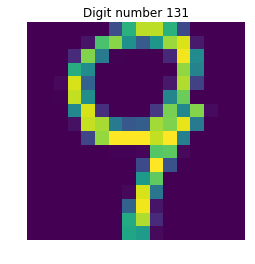

In [3]:
# STEP 2 - plot 131st digit
digit_131 = np.reshape(X_train[131],(16,16))
plt.figure()
plt.title("Digit number 131")
plt.axis("off")
plt.imshow(digit_131)
plt.show()

## Βήμα 3

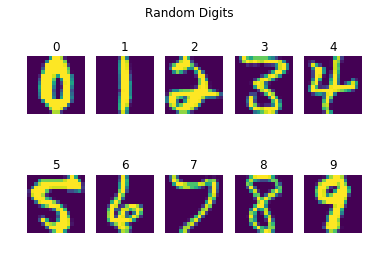

In [4]:
# STEP 3 - plot one sample for each digit 0-9
fig, axs = plt.subplots(2, 5)
fig.suptitle("Random Digits")
for digit in range(n_classes):
    rand = random.randint(0, n_samples-1)
    while (y_train[rand] != digit):
        rand = random.randint(0, n_samples-1)
    dig = np.reshape(X_train[rand],(16,16))
    axs[digit // 5, digit % 5].imshow(dig)
    axs[digit // 5, digit % 5].axis("off")
    axs[digit // 5, digit % 5].set_title(str(digit))

## Βήμα 4
Ομαδοποιώντας τα δεδομένα που έχουμε στο train set με βάση το label τους σε ένα dictionary της python και με τον τύπο της μέσης τιμής $E[X_{0 (10,10)}] = \frac{1}{N}\sum_{i=1}^{N} X_{0 (10,10)}[i]$ έχουμε:

In [5]:
digit_count = np.zeros(n_classes)
digit_mean = np.zeros((n_classes, n_features))
digit_var = np.zeros((n_classes, n_features))

for i in range(n_samples):
    digit = y_train[i]
    digit_count[digit] = digit_count[digit] + 1
    digit_mean[digit] = digit_mean[digit] + X_train[i]

for digit in range(n_classes):
    digit_mean[digit] = digit_mean[digit] / digit_count[digit]

digit_mean_zero = np.reshape(digit_mean[0],(16,16))
print("The mean value of pixel (10,10) of 0 is:", digit_mean_zero[10][10])

The mean value of pixel (10,10) of 0 is: -0.5041884422110553


## Βήμα 5
Με την παραπάνω ομαδοποίηση και σύμφωνα με τον τύπο $Var(X_{0 (10,10)}) = E[X_{0 (10,10)} - \mu_{0 (10,10)}^2] = \frac{1}{N}\sum_{i=1}^{N} (X_{0 (10,10)}[i] - E[X_0])^2$ έχουμε:

In [6]:
# STEP 5
for i in range(n_samples):
    digit = y_train[i]
    digit_var[digit] = digit_var[digit] + (X_train[i] - digit_mean[digit])**2

# Digit based on Variance
for digit in range(n_classes):
    digit_var[digit] = digit_var[digit] / (digit_count[digit] - 1)
digit_var_zero = np.reshape(digit_var[0],(16,16))
print("The variance value of pixel (10,10) of 0 is:", digit_var_zero[10][10])

The variance value of pixel (10,10) of 0 is: 0.5249618093885225


## Βήμα 6

Τυπώνοντας τις τιμές για τα πρώτα 4 features έχουμε:

In [7]:
# STEP 6

print("The mean value of 0 is: (first 4 numbers)", digit_mean[0][0:4])
print("The variance value of 0 is: (first 4 numbers)", digit_var[0][0:4])

The mean value of 0 is: (first 4 numbers) [-0.99862814 -0.99539782 -0.98492295 -0.94125126]
The variance value of 0 is: (first 4 numbers) [0.00224711 0.00661218 0.01960704 0.06295393]


## Βήμα 7

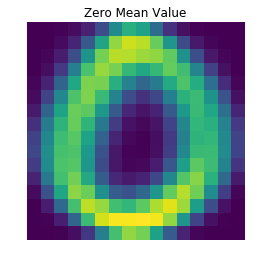

In [8]:
# STEP 7
plt.figure()
plt.title("Zero Mean Value")
plt.axis("off")
plt.imshow(digit_mean_zero)
plt.show()

## Βήμα 8

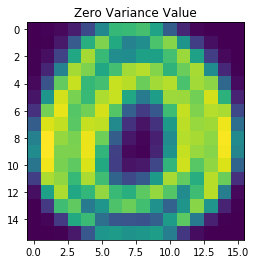

In [9]:
# STEP 8
plt.figure()
plt.title("Zero Variance Value")
plt.imshow(digit_var_zero)
plt.show()

> Παρατηρούμε ότι η διασπορά μας δίνει πληροφορία για το σε ποια σημεία γίνεται συνήθως όμοια ο σχεδιασμός του ψηφίου (πχ πάνω και κάτω), ενώ φαίνεται ότι δεξιά και αριστερά η διασπορά έχει μεγάλη τιμή που υποδεικνύει ότι ο σχεδιασμός του μηδενός ως προς το πόσο «πλατύ» είναι ποικίλει.

## Βήμα 9
Τυπώνοντας μόνο το την τιμή για το πρώτο feature έχουμε:

The mean value of 0 is: (first number only) -0.9986281407035177
The variance value of 0 is: (first number only) 0.002247105527638201
The mean value of 1 is: (first number only) -1.0
The variance value of 1 is: (first number only) 0.0
The mean value of 2 is: (first number only) -0.9924883720930233
The variance value of 2 is: (first number only) 0.005090387193373648
The mean value of 3 is: (first number only) -0.9975151975683889
The variance value of 3 is: (first number only) 0.0012149350807067123
The mean value of 4 is: (first number only) -1.0
The variance value of 4 is: (first number only) 0.0
The mean value of 5 is: (first number only) -0.9994586330935253
The variance value of 5 is: (first number only) 0.0001629514388489166
The mean value of 6 is: (first number only) -1.0
The variance value of 6 is: (first number only) 0.0
The mean value of 7 is: (first number only) -0.9749162790697675
The variance value of 7 is: (first number only) 0.017963918445760705
The mean value of 8 is: (first

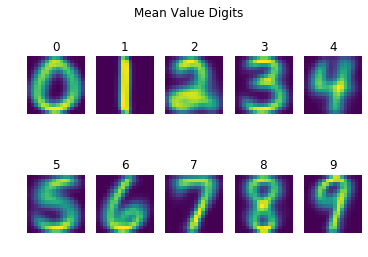

In [10]:
# STEP 9(a)
for digit in range(n_classes):
    print("The mean value of", digit, "is: (first number only)", digit_mean[digit][0])
    print("The variance value of", digit, "is: (first number only)", digit_var[digit][0])

# STEP 9(b)

# Digit based on Mean
fig, axs = plt.subplots(2, 5)
fig.suptitle("Mean Value Digits")
for digit in range(n_classes):
    axs[digit // 5, digit % 5].imshow(np.reshape(digit_mean[digit],(16,16)))
    axs[digit // 5, digit % 5].axis("off")
    axs[digit // 5, digit % 5].set_title(str(digit))

## Βήμα 10
Σύμφωνα με τον τύπο $pred(X) = \arg\min_{0 \leq i \leq 9} \| \mu - X \|_2$ έχουμε:

In [11]:
# STEP 10

digit_101_pred = np.argmin(np.linalg.norm(digit_mean - X_test[101], axis = 1))
print("Actual value of digit 101:", y_test[101])
print("The result of the Euclidean Classifier on digit 101 is:", digit_101_pred)

Actual value of digit 101: 6
The result of the Euclidean Classifier on digit 101 is: 0


> Παρατηρούμε πως η πρόβλεψη του ταξινομητή μας είναι λανθασμένη.

## Βήμα 11
Βρίσκοντας την ελάχιστη Ευκλείδεια απόσταση και συγκρίνοντας την με τo label y για κάθε δείγμα στο test set μας έχουμε:

In [12]:
# STEP 11

# Minimum Euclidean Distance from Mean
accuracy = 0.0
for i in range(n_test_samples):
    accuracy += np.argmin(np.linalg.norm(digit_mean - X_test[i], axis = 1)) == y_test[i]
accuracy /= n_test_samples
print("The accuracy of the Euclidean Classifier on the test set is:", accuracy)

The accuracy of the Euclidean Classifier on the test set is: 0.8141504733432985


## Βήμα 12
Καλούμαστε να υλοποιήσουμε τον ταξινομητή ευκλείδιας απόστασης σαν ένα scikit-learn estimator. Δημιουργούμε την κλάση EuclideanClassifier και εν συνεχεία υλοποιούμε τις μεθόδους fit, predict και score ως εξής:

- `fit()`: Υπολογίζει τα features για την κάθε κατηγορία βάσει του μέσου όρου των χαρακτηριστικών των δεδομένων εκπαίδευσης της εκάστοτε κατηγορίας
- `predict()`: Δεδομένου ενός δείγματος κάνει μια πρόβλεψη βάσει της ελάχιστης από τις ευκλείδιες αποστάσεις από τα διανύσματα χαρακτηριστικών της κάθε κατηγορίας.
- `score()`: Υπολογίζει το ποσοστό επιτυχίας του ταξινομητή πάνω σε κάποιο Test Set.


In [13]:
# STEP 12

from sklearn.base import BaseEstimator, ClassifierMixin
from collections import defaultdict
import numpy as np

class EuclideanClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None
        self.n_samples = None
        self.n_features = None
        self.n_classes = None
        self.idx2class = None
        self.class2idx = None


    def fit(self, X, y):

        """
        This should fit classifier. All the "work" should be done here.

        Calculates self.X_mean_ based on the mean
        feature values in X for each class.

        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        fit always returns self.
        """

        n_samples, n_features = X.shape
        n_classes = len(set(y))
        idx2class = sorted(list(set(y)))

        self.class2idx = defaultdict(lambda: None, {})

        for cl in idx2class:
            self.class2idx[cl] = idx2class.index(cl)

        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes

        cnt = np.zeros(n_classes)
        mean_val = np.zeros((n_classes, n_features))

        for i in range(n_samples):
            idx = self.class2idx[y[i]]
            cnt[idx] = cnt[idx] + 1
            mean_val[idx] = mean_val[idx] + X[i]

        # Digit based on Mean
        for i in range(n_classes):
            mean_val[i] = mean_val[i] / cnt[i]

        self.X_mean_ = mean_val

        return self


    def predict(self, X):
        """
        Make predictions for X based on the
        euclidean distance from self.X_mean_
        """
        n_test_samples, _ = X.shape
        C = np.array([np.argmin(np.linalg.norm(self.X_mean_ - X[i], axis = 1)) for i in range(n_test_samples)])
        
        return C


    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        n_test_samples, _ = X.shape
        y2idx = [self.class2idx[cl] for cl in y]
        accuracy = sum(np.equal(self.predict(X), y2idx)) / n_test_samples

        return accuracy


## Βήμα 13
**(α)**

In [14]:
# STEP 13

# Euclidean Classifier
clf = EuclideanClassifier()
clf.fit(X_train, y_train)

# 5-Fold Cross-Validation
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)
average_score = np.mean(cross_val_score(EuclideanClassifier(), X, y, cv = 5))
print("The average score using 5-fold cross-validation is:", average_score)

The average score using 5-fold cross-validation is: 0.841773724173982


**(β)** Τα features που αντιπροσωπεύουν κάθε ψηφίο αποτελούν διανύσματα 256 διαστάσεων και καλούμαστε να βρούμε τις περιοχές απόφασης (decision boundaries). Ωστόσο, προκειμένου να μπορέσει να γίνει οπτικοποίηση των περιοχών απόφασης θα εφαρμόσουμε PCA ώστε να μειώσουμε τον αριθμό των διαστάσεων απο 256 σε 2. Οι περιοχές απόφασης που θα υπολογίσουμε για τις δύο διαστάσεις δεν μας δίνουν το ίδιο καλή πληροφορία με τις 256, αλλά μπορούμε να έχουμε μια κάποια εικόνα των περιοχών απόφασης του εκτιμητή μας. Παρακάτω παρατίθεται το διάγραμμα αυτών των περιοχών απόφασης σε δύο διαστάσεις με τα χρωματισμένα σημεία των περιοχών να αποτέλουν τα δισδιάστατα διανύσματα χαρακτηριστικών για το εκάστοτε ψηφίου:

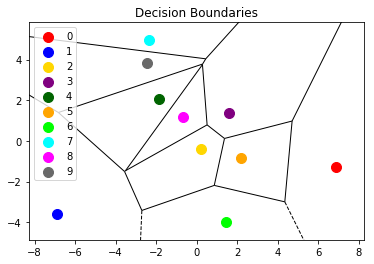

In [15]:
def plot_decision_boundaries(points):

    vor = Voronoi(points)
    voronoi_plot_2d(vor,show_points=False, show_vertices=False)
    plt.scatter(points[:,0], points[:,1], c=range(10), s=30, edgecolor = 'k')
    cdict = {0 : 'red', 1 : 'blue', 2 : 'gold', 3 : 'purple', 4 : 'darkgreen', 5 : 'orange', 6 : 'lime', 7 : 'cyan', 8 : 'magenta', 9 : 'dimgray'}

    for point,label in zip(points,range(10)):
        plt.scatter(point[0], point[1], c=cdict[label], label = label, s = 100)
        label += 1
    plt.legend(prop={'size':10})
    plt.title('Decision Boundaries')
    plt.show()

    return

# PCA 256 to 2 dims => for Decision Boundaries visualization
X_train_reduced = PCA(n_components=2).fit_transform(X_train)
X_test_reduced = PCA(n_components=2).fit_transform(X_test)

clf2 = EuclideanClassifier()
clf2.fit(X_train_reduced, y_train)

# Plot Decision Boundaries for 2 dims
plot_decision_boundaries(clf2.X_mean_)

**(γ)** Για όλα μας τα δεδομένα (test και train μαζί) και χρησιμοποιώντας 5-fold cross-validation έχουμε τις παρακάτω καμπύλες εκμάθησης (learning curves):

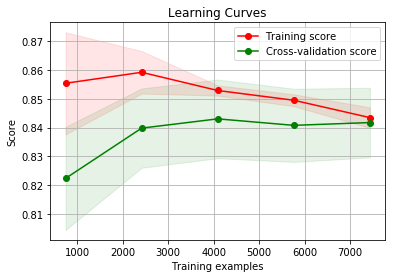

In [16]:
# 13.c
# Plot Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

plot_learning_curve(EuclideanClassifier(), "Learning Curves", X, y, cv = 5, n_jobs= 4)

## Βήμα 14
Για τις a-priori πιθανότητες έχουμε:

In [17]:
# Step 14 - a priori probabilities

labels, counts = np.unique(y_train, return_counts = True)
a_priori = defaultdict(lambda : 0, {})
for label, cnt in zip(labels, counts):
    a_priori[label] = cnt / y_train.size
    print("Class label:", label, "with a-priori probability:", a_priori[label])

Class label: 0 with a-priori probability: 0.16376354409546015
Class label: 1 with a-priori probability: 0.13784117405019888
Class label: 2 with a-priori probability: 0.10026059525442327
Class label: 3 with a-priori probability: 0.09024825126868742
Class label: 4 with a-priori probability: 0.08942531888629818
Class label: 5 with a-priori probability: 0.07625840076807022
Class label: 6 with a-priori probability: 0.09107118365107666
Class label: 7 with a-priori probability: 0.08846523110684405
Class label: 8 with a-priori probability: 0.07433822520916199
Class label: 9 with a-priori probability: 0.08832807570977919


## Βήμα 15

**(α)** Σε αυτό το βήμα καλούμαστε να υλοποιήσουμε έναν Naive Bayesian Classifier κάνοντας χρήση των μέσων τιμών και διασπορών που έχουν υπολογιστεί παραπάνω για τα δεδομένα εκπαίδευσης. Παρακάτω φαίνεται η υλοποίηση της κλάσης NaiveBayesClassifier η οποία είναι συμβατή με το scikit-learn:

In [185]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import defaultdict
import numpy as np

class NaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on applying Bayes theorem with
       strong (naïve) independence assumptions between the features"""

    def __init__(self, unitVar = False):
        self.X_mean_ = None
        self.X_var_ = None
        self.n_samples = None
        self.n_features = None
        self.n_classes = None
        self.idx2class = None
        self.class2idx = None
        self.unitVar = unitVar


    def fit(self, X, y):

        """
        This should fit classifier. All the "work" should be done here.

        Calculates self.X_mean_ self.X_mean_var and self.a_priori_ based on the mean and variance
        feature values in X for each class, and on the prior probability feature values of each class.

        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        self.X_var_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        self.a_priori_ becomes a dictionary of shape
        with n_classes number of keys

        fit always returns self.
        """

        n_samples, n_features = X.shape
        n_classes = len(set(y))
        self.idx2class = np.unique(y)

        self.class2idx = defaultdict(lambda: None, {})

        for idx in range(n_classes):
            cl = self.idx2class[idx]
            self.class2idx[cl] = idx

        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes

        cnt = np.zeros(n_classes)
        mean_val = np.zeros((n_classes, n_features))
        var_val = np.zeros((n_classes, n_features))

        for i in range(n_samples):
            idx = self.class2idx[y[i]]
            cnt[idx] = cnt[idx] + 1
            mean_val[idx] = mean_val[idx] + X[i]

        # Mean
        for i in range(n_classes):
            mean_val[i] = mean_val[i] / cnt[i]

        # Variance
        if (self.unitVar):
            var_val = np.ones((n_classes, n_features))
        else:
            for idx in range(n_classes):
                var_val[idx] = np.var(X[y == self.idx2class[idx]], axis = 0)
            var_val += np.finfo(np.float32).eps
            
        # Step 14 - a priori probabilities
        labels, counts = np.unique(y, return_counts = True)
        a_priori = defaultdict(lambda : 0, {})
        for label, cnt in zip(labels, counts):
            a_priori[label] = cnt / y.size

        self.X_mean_ = mean_val
        self.X_var_ = var_val
        self.a_priori_ = a_priori

        return self


    def predict(self, X):
        """
        Make predictions for X based on
        Bayes Theroem using Gaussian distributions
        """

        def gaussian_logpdf_vector(xs, ms, vs):
            gaussian_logpdf_1d = lambda x, m, v : -0.5*np.log(2*np.pi * v) - 0.5*(((x - m)**2 )/ v)
            prob = 0
            for x, m, v in zip(xs, ms, vs):
                prob += gaussian_logpdf_1d(x, m, v)
            return prob

        n_test_samples, _ = X.shape
        C = np.zeros(n_test_samples)
        for i in range(n_test_samples):
            maxi = float("-inf")
            prediction = 0
            for idx in range(self.n_classes):
                log_prob1 = gaussian_logpdf_vector(X[i], self.X_mean_[idx], self.X_var_[idx])
                log_prob2 = np.log(self.a_priori_[self.idx2class[idx]])
                log_prob = log_prob1 + log_prob2
                if log_prob >= maxi:
                    prediction = idx
                    maxi = log_prob
            C[i] = self.idx2class[prediction]

        return C


    def score(self, X, y):

        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """

        n_test_samples, _ = X.shape
        accuracy = sum(np.equal(self.predict(X), y)) / n_test_samples

        return accuracy


Ύστερα, καλούμε τον `NaiveBayesClassifier()`, την μέθοδο `fit()` για την εκπαίδευση του στο Train Set και στη συνέχεια την `predict()` για την ταξινόμηση των δεδομένων του Test Set:

In [186]:
myGNB = NaiveBayesClassifier().fit(X_train, y_train)
myGNB_preds = myGNB.predict(X_test)

**(β)** Η επίδοση του Naive Bayesian Classifier που υλοποιήσαμε φαίνεται παρακάτω:

In [187]:
print("Naive Bayes Classifier (with our implementation) score is:", myGNB.score(X_test, y_test))

Naive Bayes Classifier (with our implementation) score is: 0.7309417040358744


**(γ)** Τώρα καλούμαστε να συγκρίνουμε την υλοποίηση μας του Naive Bayesian Classifier με αυτήν του sci-kit learn (GaussianNB):

In [182]:
gnb = GaussianNB().fit(X_train, y_train)
print("The GaussianNB Classifier score is:", gnb.score(X_test, y_test))

The GaussianNB Classifier score is: 0.7194818136522172


>Παρατηρούμε οτι οι δύο υλοποιήσεις έχουν πολύ μικρή απόκλιση όσον αφορά την επίδοση τους. Η απόκλιση αυτή ασφαλώς και δεν είναι ανησυχητική, καθώς μπορεί να οφείλεται σε αυθαίρετους παράγοντες όπως η τιμή της μικρή ποσότητα που προσθέτουμε σε όλες τις τιμές του variance για να αποφευχθεί το division by zero που συμβαίνει σε πολλές περιπτώσεις λόγω μηδενικής διασποράς, η χρήση ή μη Bessel's correction στον υπολογισμό των διασπορών και άλλες τέτοιες μικρές λεπτομέρειες.

## Βήμα 16

Σε αυτό το βήμα θα υποθέσουμε ότι έχουμε μοναδιαίο variance για όλα μας τα χαρακτηριστικά για κάθε κατηγορία. Το αποτέλεσμα αυτής της υπόθεσης φαίνεται παρακάτω:

In [189]:
gnb1 = NaiveBayesClassifier(unitVar=True).fit(X_train, y_train)
print("The GaussianNB Classifier score is:", gnb1.score(X_test, y_test))

The GaussianNB Classifier score is: 0.8126557050323866


>Παρατηρούμε καλύτερη επίδοση όταν υποθέσουμε ότι έχουμε παντού μοναδιαίο variance το οποίο οφείλεται στο ότι οι πραγματικές διασπορές που υπολογίζουμε έχουν τιμές πολύ μικρές (κοντά στο 0) πράγμα που διαισθητικά σημαίνει ότι οι γκαουσιανές που αντιστοιχίζουμε σε κάθε pixel έχουν πάρα πολύ μικρό έυρος και έτσι τελικά έχουμε μια γκαουσιανή προσέγγιση της Dirac Delta function $\delta(x-\mu)=\lim_{\sigma\to0} N(\mu,\sigma)$, και επίσης όσο πιο μικρή τιμή διασποράς έχω τόσο πιο υπερβολικά μεγάλες τιμές θα αποκτήσει το εκθετικό.

## Βήμα 17

In [233]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings

names = []
# Gaussian Naive Bayes
gnb = GaussianNB()
print("The GaussianNB Classifier score is:", gnb.fit(X_train, y_train).score(X_test, y_test))
names.append(gnb.__class__.__name__)

# K Nearest Neighbors
KNNs = {}
for k in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
    print("The KNN Classifier with k =", k, "score is:", knn.fit(X_train, y_train).score(X_test, y_test))
    KNNs[k] = knn
    names.append(knn.__class__.__name__ + ' k='+str(k))

# Support Vector Machine (SVC) with different kernels and gamma='auto'
SUPs = []
for kernel in ['rbf', 'poly', 'sigmoid', 'linear']:
    sup = svm.SVC(kernel=kernel, gamma='auto', probability=True)
    print("The SVM Classifier score with "+kernel+" kernel and gamma='auto' is:", sup.fit(X_train, y_train).score(X_test, y_test))
    SUPs.append(sup)
    names.append(sup.__class__.__name__+' kernel='+kernel+' gamma=auto')

# Support Vector Machine (SVC) with different kernels and gamma='scale'
SUPs_scale = []
for kernel in ['rbf', 'poly', 'sigmoid', 'linear']:
    sup = svm.SVC(kernel=kernel, gamma='scale', probability=True)
    print("The SVM Classifier score with "+kernel+" kernel and gamma='scale' is:", sup.fit(X_train, y_train).score(X_test, y_test))
    SUPs.append(sup)
    names.append(sup.__class__.__name__+' kernel='+kernel+' gamma=scale')
    

The GaussianNB Classifier score is: 0.7194818136522172
The KNN Classifier with k = 1 score is: 0.9436970602889886
The KNN Classifier with k = 2 score is: 0.9412057797708022
The KNN Classifier with k = 3 score is: 0.9446935724962631
The KNN Classifier with k = 4 score is: 0.9431988041853513
The KNN Classifier with k = 5 score is: 0.9446935724962631
The KNN Classifier with k = 6 score is: 0.9387144992526159
The KNN Classifier with k = 7 score is: 0.9417040358744395
The SVM Classifier score with rbf kernel and gamma='auto' is: 0.9422022919780767
The SVM Classifier score with poly kernel and gamma='auto' is: 0.9466865969108121
The SVM Classifier score with sigmoid kernel and gamma='auto' is: 0.9147982062780269
The SVM Classifier score with linear kernel and gamma='auto' is: 0.9262580966616841
The SVM Classifier score with rbf kernel and gamma='scale' is: 0.9471848530144494
The SVM Classifier score with poly kernel and gamma='scale' is: 0.953662182361734
The SVM Classifier score with sigmoi

## Βήμα 18

Σε αυτό το βήμα καλούμαστε να κάνουμε χρήση κάποιων ensembling τεχνικών.
<br></br>
<br>
**(α)** Σε πρώτη φάση θα χρησιμοποιήσουμε τον Voting Classifier με τον οποίο θα συνδυάσουμε διαφορετικούς εκτιμητές προκειμένουμε να επιτύχουμε καλύτερη επίδοση. Μια καλή τακτική είναι να συνδυάσουμε μεταξύ τους ταξινομήτές οι οποίοι έχουν καλή επίδοση καθώς και την τάση να κάνουν λάθη σε διαφορετικά πράγματα. Επομένως, υπολογίζουμε πόσα λάθη κάνει ο κάθε ένας εκ των ταξινομήτων μας στο εκάστοτε ψηφίο και στη συνέχεια επιλέγουμε αυτούς των οποίων οι τύποι των λαθών διέφεραν περισσότερο.
</br>

In [237]:
def find_errors(predictions, y):
    errors = y[predictions != y]
    unique, counts = np.unique(errors, return_counts=True)
    all_errors = dict(zip(unique, counts))
    errors_ordered = [(k, all_errors[k]) for k in sorted(all_errors, key=all_errors.get, reverse=False)]
    return errors_ordered

clfs = [gnb] + list(KNNs.values()) + SUPs
errors = [find_errors(clf.predict(X_test), y_test) for clf in clfs]

Οι ταξινομητές που θα συνδυάσει ο Voting Classifier είναι:
- 3NN
- SVM (RFB kernel)
- SVM (Polynomial kernel)
- SVM (Sigmoid kernel)
- SVM (Linear kernel)

Παρακάτω βλέπουμε την επίδοση του Voting Classifier με χρήση των ταξινομητών που μόλις αναφέρθηκαν συνδυασμένους πρώτα σε hard και στη συνέχεια σε soft voting:

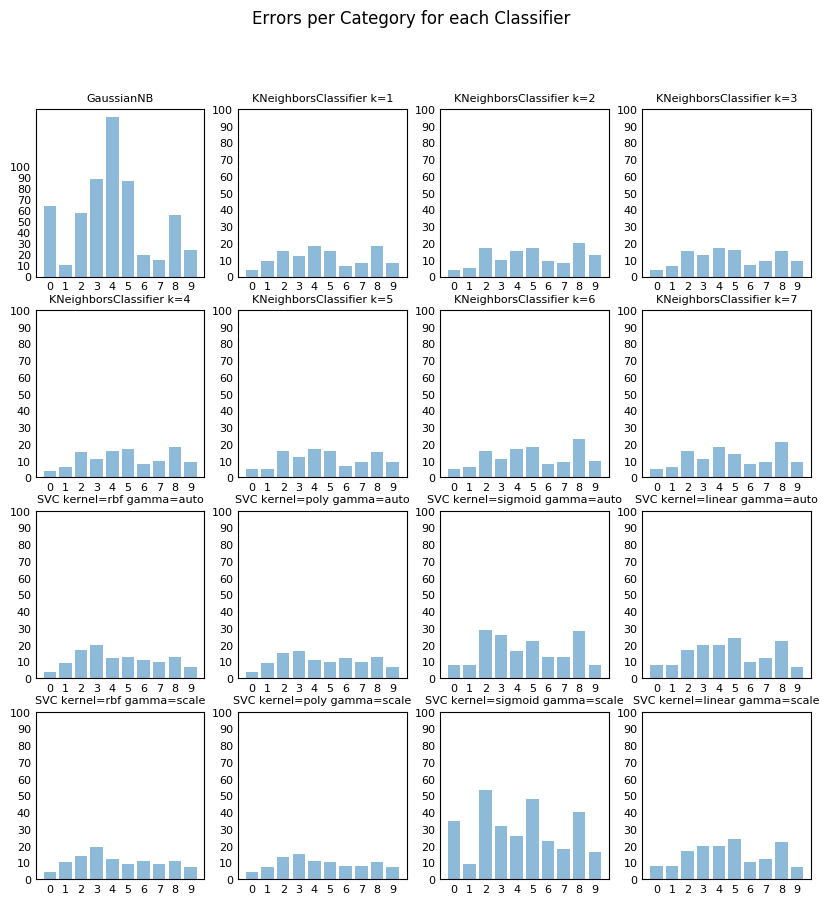

In [236]:
import matplotlib.pyplot as plt; plt.rcdefaults()

fig, axs = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("Errors per Category for each Classifier")
xs = list(range(10))
for i in range(len(errors)):
    ys = [x[1] for x in sorted(errors[i],key = lambda x: x[0])]
    y_pos = np.arange(len(xs))
    axs[i // 4, i % 4].bar(y_pos, ys, align='center', alpha=0.5)
    axs[i // 4, i % 4].tick_params(labelsize=8, length=0)
#     axs[i // 4, i % 4].set_title('clf-'+str(i),fontsize=9)    
    axs[i // 4, i % 4].set_title(names[i], fontsize=8) 
#     plt.ylabel('Usage')
#     plt.title('Programming language usage')
plt.setp(axs, xticks=xs, xticklabels=xs, yticks=np.arange(0,101,10))
plt.show()


In [175]:
from sklearn.ensemble import VotingClassifier

estimators = [('3NN', clfs[3]), ('SVC-rbf', clfs[12]),
              ('SVC-poly', clfs[13]), ('SVC-sigmoid', clfs[11]),
              ('SVC-linear', clfs[10])]

print('The Voting Classifier combining the following classifiers:',', '.join([x for x,_ in estimators]), '\n')
# Hard Voting Classifier
# hardVotingClf = VotingClassifier(estimators=estimators, voting='hard').fit(X_train, y_train)
print(np.mean(cross_val_score(VotingClassifier(estimators=estimators, voting='hard'), X, y, cv = 5)))
# print('- scores', hardVotingClf.score(X_test, y_test), 'using Hard Voting')

# Soft Voting Classifier
# softVotingClf = VotingClassifier(estimators=estimators, voting='soft').fit(X_train, y_train)
print(np.mean(cross_val_score(VotingClassifier(estimators=estimators, voting='soft'), X, y, cv = 5)))
# print('- scores', softVotingClf.score(X_test, y_test), 'using Soft Voting')

The Voting Classifier combining the following classifiers: 3NN, SVC-rbf, SVC-poly, SVC-sigmoid, SVC-linear 

0.9721254208520097
0.9740603312263844


Στην περίπτωση που πρόκειται για ταξινόμηση σε δύο κλάσεις (δηλαδή n_classes = 2) πρέπει να επιλέγεται περιττό πλήθος ταξινομητών που θα συνδυαστούν προκειμένου να αποφευχθούν οι περιπτώσεις ισοπαλιών (κυρίως για την περίπτωση του hard voting που η τελική ταξινόμηση γίνεται απο καθαρή πλειοψηφία και δεν σχετίζεται με την πιθανότητα της απόφασης του εκάστοτε ταξινομητή).

**(β)** Τώρα θα χρησιμοποιήσουμε τον Bagging Classifier με τον οποίο θα χωρίσουμε το Train Set σε n_estimators το πλήθος τυχαία (πιθανώς επικαλυπτώμενα) υποσύνολα και θα εφαρμόσουμε έναν ταξινομήτη σε κάθε ένα από αυτά. Παρακάτω βλέπουμε την επίδοση του Bagging Classifier με χρήση SVM Classifier με Polynomial kernel για διάφορες τιμές της παραμέτρου n_estimators:

In [96]:
from sklearn.ensemble import BaggingClassifier

for n_estimators in range(1,15):
    BaggingClf = BaggingClassifier(clfs[12], n_estimators=n_estimators).fit(X_train, y_train)
    print('The Bagging Classifier using SVM with poly kernel and n_estimators =',
                       n_estimators, 'scores:', BaggingClf.score(X_test, y_test))
    

The Bagging Classifier using SVM with poly kernel and n_estimators = 1 scores: 0.9431988041853513
The Bagging Classifier using SVM with poly kernel and n_estimators = 2 scores: 0.9461883408071748
The Bagging Classifier using SVM with poly kernel and n_estimators = 3 scores: 0.9476831091180867
The Bagging Classifier using SVM with poly kernel and n_estimators = 4 scores: 0.9451918285999004
The Bagging Classifier using SVM with poly kernel and n_estimators = 5 scores: 0.9476831091180867
The Bagging Classifier using SVM with poly kernel and n_estimators = 6 scores: 0.9486796213253612
The Bagging Classifier using SVM with poly kernel and n_estimators = 7 scores: 0.9451918285999004
The Bagging Classifier using SVM with poly kernel and n_estimators = 8 scores: 0.9496761335326358
The Bagging Classifier using SVM with poly kernel and n_estimators = 9 scores: 0.9456900847035377
The Bagging Classifier using SVM with poly kernel and n_estimators = 10 scores: 0.9461883408071748
The Bagging Classif

Ο συνδυασμός του Bagging Classifier με τον Decision Tree Classifier ως Base estimator είναι ο Random Forest Classifier του οποίου η επίδοση για n_estimators = 100 φαίνεται παρακάτω:

In [101]:
from sklearn.tree import DecisionTreeClassifier

RandomForestClf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100).fit(X_train, y_train)
print('The Bagging Classifier using Decision Tree and n_estimators =',
                 100, 'scores:', RandomForestClf.score(X_test, y_test))

The Bagging Classifier using Decision Tree and n_estimators = 100 scores: 0.8958644743398106


**(γ)** 
<p>Ο Voting Classifier με hard και soft voting παρατηρούμε ότι δίνουν παρόμοια ποσοστά επιτυχίας μεταξύ τους αλλά είναι σχεδόν ίδια και με τα ποσόστα επιτυχίας των επιλεγμένων προς συνδυασμό ταξινομητών. Ο λόγος που δεν παρατηρείται επίδοση υψηλότερη των επιμέρους επιδόσεων είναι το ότι οι ταξινομήτες, μεταξύ των οποίων κληθήκαμε να επιλέξουμε μερικούς, διαφέρουν αμελητέα ως προς τον αριθμό των λαθών που κάνουν στην ταξινόμηση του εκάστοτε ψηφίου. Επομένως, για κάνεναν εκ των ταξινομητών δε δίνεται η δυνατότητα διόρθωσης των λαθών που κάνει από τους υπόλοιπους.</p>
<p>Ο Bagging Classifier παρατηρούμε επίσης ότι έχει πολύ καλή επίδοση η όποία αλλάζει αμελητέα σε σχέση με την αλλάγη της παραμέτρου n_estimators. Η επίδοση βέβαια πάλι είναι όμοια αυτής του ίδιου του ταξινομητή που χρησιμοποιείται ως Base Estimator.</p>

## Βήμα 19 (Extra)
**(α)** Παρακάτω χρησιμοποιώντας την κλάση `DigitDataset` (που κληρονομεί από την κλάση `Dataset` της `pytorch`) καθώς και την βοηθητική συνάρτηση `DigitDatasetLoader` παίρνουμε τα `Train`, `Validation` και `Test Set`

In [9]:
import torch
import numpy as np
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

class DigitDataset(Dataset):
    """ Digits Dataset """

    def __init__(self, datatype, device):
        assert datatype == 'train' or datatype == 'test'
        self.datatype = datatype
        xy = np.loadtxt('./pr_lab1_2016-17_data/' + datatype + '.txt')
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 1:]).to(device).float()
        self.y_data = torch.from_numpy(xy[:, 0]).to(device).long()

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

def DigitDatasetLoader(N, frac, device):

    train_val_set = DigitDataset('train', device)
    n_train_val = len(train_val_set)
    n_train = int(frac*n_train_val)
    n_val = n_train_val - n_train
    train_set, val_set = data.random_split(train_val_set, (n_train, n_val))
    test_set = DigitDataset('test', device)
    n_test = len(test_set)

    train_loader = DataLoader(train_set, batch_size=N, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=N, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=N, shuffle=True)

    return train_loader, n_train, val_loader, n_val, test_loader, n_test

**(β)** Αφου πειραματιστήκαμε με διάφορες αρχιτεκτονικές (ως προς τα επίπεδα και το πλήθος των νευρώνων, καθώς και με διαφορετικές activation functions, στα πλαίσια του βήματος αυτού το δίκτυο μας αποτελείται από 2 γραμμικά Layers, με ένα Hidden Layer μεγέθους H features και ως συνάρτηση ενεργοποίησης έχουμε χρησιμοποιήσει την $ReLU(x) = \max (0,x)$. Στο τελευταίο επίπεδο, για την κανονικοποίηση των τιμών που έχουν οι 10 τελικοί νευρώνες έχουμε χρησιμοποιήσει `softmax`.

In [10]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return self.softmax(y_pred)

**(γ)** Για `Batch size = 128`, `Hidden Layer size = 100`, `Loss function = Cross Entropy Loss`, `Optimizer = Stochastic Gradient Descent` με `learning rate = 0.01` και `momentum = 0.9` και ποσοστά `90%-10%` για το `Train` και το `Validation Set` αντίστοιχα έχουμε:

In [13]:
import os
import matplotlib.pyplot as plt
from torch.utils import data
from torch.autograd import Variable
from torch.utils.data import DataLoader

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(  'DEVICE:', DEVICE,
            '\ncuda Version:', torch.version.cuda,
            '\nn_cuda =', torch.cuda.device_count(),
            '\nCuda Name(s):', torch.cuda.get_device_name(0)    )

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 128, 256, 100, 10

# 90% Train - 10 % Validation
train_loader, n_train, val_loader, n_val, test_loader, n_test = DigitDatasetLoader(N, 0.9, DEVICE)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out).to(DEVICE)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

#function to calculate accuracy of model
def accuracy(y_hat, y):
     pred = torch.argmax(y_hat, dim=1)
     return (pred == y).float().sum()

def train_and_val_model(epochs, criterion, optimizer, model, train, validation, n_val):

    # TRAINING

    # if os.path.exists("./train.model"):
    #     model.load_state_dict(torch.load("./train.model"))
    #     # model.eval()
    #     print("Loaded from pre-trained model")
    
    print("TRAINING...")

    total_epochs = []
    total_acc = []
    total_loss = []
    for epoch in range(epochs+1):
        model.train()
        for data in train:
            # get the inputs
            inputs, labels = data

            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # Forward pass: Compute predicted y by passing x to the model
            y_pred = model(inputs)

            # Compute and print loss
            loss = criterion(y_pred, labels)

            # Zero gradients, perform a backward pass, and update the weights.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # VALIDATING

        model.eval()
        acc = 0
        with torch.no_grad():
            for data in validation:
                inputs, labels = data
                y_pred = model(inputs)
                acc += accuracy(y_pred, labels)
        print("Epoch:", epoch, "with loss:", loss.item(), "and accuracy on validation:", acc.item()/n_val)
        total_epochs.append(epoch)
        total_acc.append(acc.item()/n_val)
        total_loss.append(loss.item())

    # torch.save(model.state_dict(), "./train.model")

    plt.figure()
    plt.title("Train and Validation")
    plt.xlabel("Epochs")
    plt.plot(total_epochs, total_loss, 'o-', color="r",
             label="Training Loss")
    plt.plot(total_epochs, total_acc, 'o-', color="g",
             label="Validation Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


def test_model(model, test, n_test):

    # TESTING

    print("TESTING...")

    model.eval()
    acc = 0
    with torch.no_grad():
        for data in test:
            inputs, labels = data

            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            y_pred = model(inputs)
            acc += accuracy(y_pred, labels)
    print("Test set accuracy:", acc.item()/n_test)

**(δ)**

TRAINING...
Epoch: 0 with loss: 2.224674701690674 and accuracy on validation: 0.29315068493150687
Epoch: 1 with loss: 2.1448729038238525 and accuracy on validation: 0.42876712328767125
Epoch: 2 with loss: 1.935572862625122 and accuracy on validation: 0.6356164383561644
Epoch: 3 with loss: 1.7541650533676147 and accuracy on validation: 0.7150684931506849
Epoch: 4 with loss: 1.695031762123108 and accuracy on validation: 0.7657534246575343
Epoch: 5 with loss: 1.7427741289138794 and accuracy on validation: 0.7849315068493151
Epoch: 6 with loss: 1.7796483039855957 and accuracy on validation: 0.7931506849315069
Epoch: 7 with loss: 1.6373786926269531 and accuracy on validation: 0.8054794520547945
Epoch: 8 with loss: 1.637913465499878 and accuracy on validation: 0.8095890410958904
Epoch: 9 with loss: 1.6842491626739502 and accuracy on validation: 0.815068493150685
Epoch: 10 with loss: 1.8202062845230103 and accuracy on validation: 0.8383561643835616
Epoch: 11 with loss: 1.642441987991333 and a

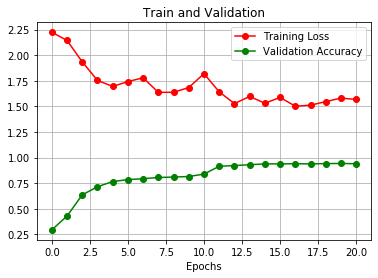

TESTING...
Test set accuracy: 0.909317389138017


In [14]:
# Train and Validate model
train_and_val_model(20, criterion, optimizer, model, train_loader, val_loader, n_val)

# Test model
test_model(model, test_loader, n_test)

> Παρατηρούμε πως εκπαιδεύοντας το δίκτυο μας για 20 εποχές πετυχαίνουμε στο Test Set $accuracy \approx 90\% $, απόδοση αρκετά καλή δεδομένου του ότι το δίκτυο μας είναι αρκετά απλοϊκό (γραμμικό δίκτυο - λίγα layers). Παρατηρούμε επίσης πως μετά τις 15 εποχές το accuracy στο Validation δεν αυξάνεται και παραμένει σχετικά σταθερό (οπότε θα μπορούσαμε να σταματήσουμε εκεί το training).